In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
#import kerastuner
import numpy as np
import os
#import cv2
from glob import glob
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from IPython.display import Image

In [2]:
from itertools import cycle
#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from tensorflow.keras.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,clipvalue=0.5, decay=0.01)

In [4]:
train_path = 'D:/MScCS/thesis/Dataset/new/train'
valid_path = 'D:/MScCS/thesis/Dataset/new/test'

In [5]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [7]:
inception = Sequential()

In [8]:
#layers
#x = Flatten()(inception.output)
inception.add(Flatten(input_shape=inceptionv3.output_shape[1:]))

In [9]:
folders = glob('D:/MScCS/thesis/Dataset/new/train/*')

In [10]:

inception.add(Dense(256, activation='relu'))
inception.add(Dropout(0.2))
inception.add(Dense(len(folders), activation='softmax')) 
model = Model(inputs=inceptionv3.input, outputs=inception(inceptionv3.output))

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range= 45,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')


Found 200 images belonging to 4 classes.


In [16]:
itr = test_datagen.flow_from_directory(
'D:/MScCS/thesis/Dataset/new/test',
target_size=(224,224),
batch_size=8,
class_mode='categorical')

#X, y = itr.next()
x_test, y_test = itr.next()

n_classes = 4
lw = 2

Found 200 images belonging to 4 classes.


In [17]:
classes = ['cocci', 'healthy', 'ncd', 'salmo']
def plot_roc_curve():
    #roc curve plot

    y_score = model.predict(x_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )
    
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

In [18]:
def plot_loss_acc():
    # plotting the loss
    plt.plot(r.history['loss'], label='train loss')
    plt.plot(r.history['val_loss'], label='val loss')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

    # plotting the accuracy
    plt.plot(r.history['accuracy'], label='train accuracy')
    plt.plot(r.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

In [21]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
100/100 [==============================] - 52s 400ms/step - loss: 1.1552 - accuracy: 0.6900 - val_loss: 0.3642 - val_accuracy: 0.8650
Epoch 2/10
100/100 [==============================] - 37s 364ms/step - loss: 0.3586 - accuracy: 0.8725 - val_loss: 0.3162 - val_accuracy: 0.8800
Epoch 3/10
100/100 [==============================] - 35s 345ms/step - loss: 0.2782 - accuracy: 0.9112 - val_loss: 0.3324 - val_accuracy: 0.8900
Epoch 4/10
100/100 [==============================] - 35s 348ms/step - loss: 0.2274 - accuracy: 0.9125 - val_loss: 0.2779 - val_accuracy: 0.9100
Epoch 5/10
100/100 [==============================] - 35s 349ms/step - loss: 0.1724 - accuracy: 0.9325 - val_loss: 0.2482 - val_accuracy: 0.9100
Epoch 6/10
100/100 [==============================] - 37s 371ms/step - loss: 0.1641 - accuracy: 0.9463 - val_loss: 0.2417 - val_accuracy: 0.9200
Epoch 7/10
100/100 [==============================] - 37s 366ms/step - loss: 0.1861 - accuracy: 0.9325 - val_loss: 0.2379 - val_ac

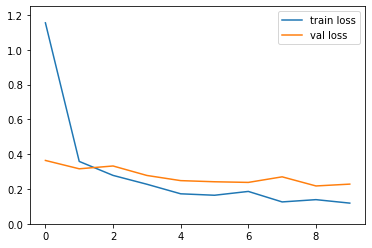

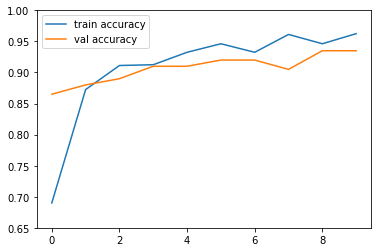

In [26]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.00, 1.25)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(0.65, 1.0)
plt.show()


1/1 [==============================] - 1s 1s/step


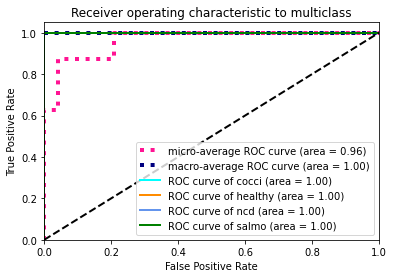

In [27]:
plot_roc_curve()
model.save('./models/inception_10.h5')

In [28]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
100/100 [==============================] - 35s 351ms/step - loss: 0.1210 - accuracy: 0.9563 - val_loss: 0.2050 - val_accuracy: 0.9300
Epoch 2/15
100/100 [==============================] - 34s 338ms/step - loss: 0.1175 - accuracy: 0.9625 - val_loss: 0.1968 - val_accuracy: 0.9300
Epoch 3/15
100/100 [==============================] - 34s 341ms/step - loss: 0.1116 - accuracy: 0.9638 - val_loss: 0.2245 - val_accuracy: 0.9300
Epoch 4/15
100/100 [==============================] - 34s 344ms/step - loss: 0.1140 - accuracy: 0.9550 - val_loss: 0.2185 - val_accuracy: 0.9350
Epoch 5/15
100/100 [==============================] - 36s 361ms/step - loss: 0.0924 - accuracy: 0.9675 - val_loss: 0.2476 - val_accuracy: 0.9250
Epoch 6/15
100/100 [==============================] - 35s 353ms/step - loss: 0.1041 - accuracy: 0.9650 - val_loss: 0.1965 - val_accuracy: 0.9300
Epoch 7/15
100/100 [==============================] - 35s 350ms/step - loss: 0.0976 - accuracy: 0.9650 - val_loss: 0.2120 - val_ac

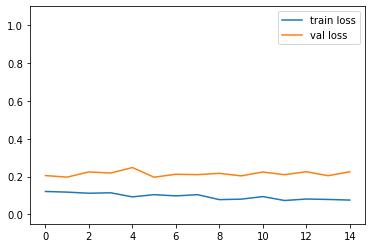

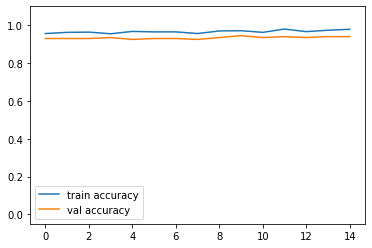

1/1 [==============================] - 0s 32ms/step


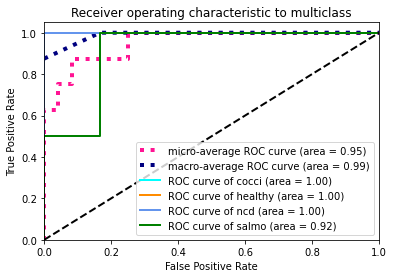

In [29]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_15.h5')

In [34]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 42s 424ms/step - loss: 0.0703 - accuracy: 0.9812 - val_loss: 0.2033 - val_accuracy: 0.9400
Epoch 2/20
100/100 [==============================] - 36s 362ms/step - loss: 0.0748 - accuracy: 0.9787 - val_loss: 0.2133 - val_accuracy: 0.9350
Epoch 3/20
100/100 [==============================] - 37s 366ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.2045 - val_accuracy: 0.9400
Epoch 4/20
100/100 [==============================] - 36s 362ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.1913 - val_accuracy: 0.9350
Epoch 5/20
100/100 [==============================] - 35s 349ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.2193 - val_accuracy: 0.9350
Epoch 6/20
100/100 [==============================] - 35s 354ms/step - loss: 0.0638 - accuracy: 0.9825 - val_loss: 0.2008 - val_accuracy: 0.9400
Epoch 7/20
100/100 [==============================] - 35s 353ms/step - loss: 0.0767 - accuracy: 0.9762 - val_loss: 0.2155 - val_ac

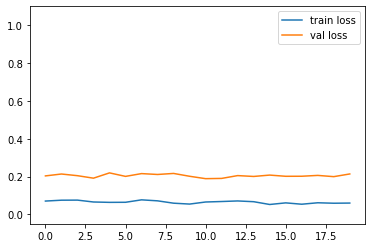

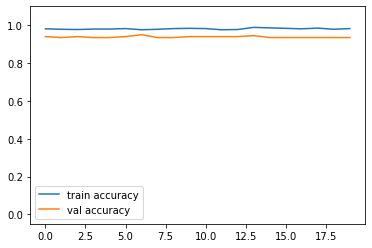

1/1 [==============================] - 0s 37ms/step


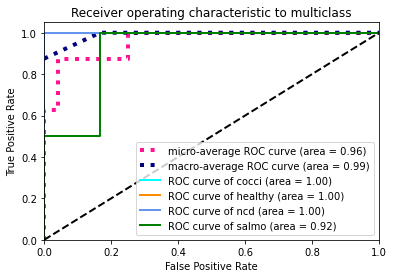

In [35]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_20.h5')

In [40]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
100/100 [==============================] - 35s 346ms/step - loss: 0.0525 - accuracy: 0.9850 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 2/25
100/100 [==============================] - 34s 339ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.1923 - val_accuracy: 0.9400
Epoch 3/25
100/100 [==============================] - 34s 338ms/step - loss: 0.0533 - accuracy: 0.9800 - val_loss: 0.2085 - val_accuracy: 0.9400
Epoch 4/25
100/100 [==============================] - 34s 339ms/step - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.1961 - val_accuracy: 0.9400
Epoch 5/25
100/100 [==============================] - 34s 338ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.2032 - val_accuracy: 0.9350
Epoch 6/25
100/100 [==============================] - 34s 338ms/step - loss: 0.0567 - accuracy: 0.9800 - val_loss: 0.1850 - val_accuracy: 0.9450
Epoch 7/25
100/100 [==============================] - 34s 341ms/step - loss: 0.0397 - accuracy: 0.9900 - val_loss: 0.2013 - val_ac

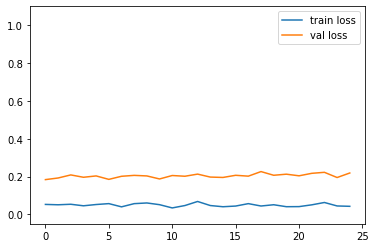

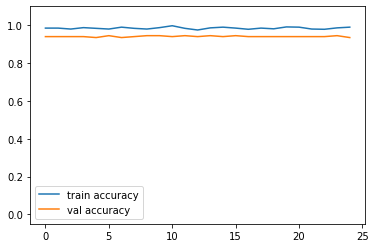

1/1 [==============================] - 0s 35ms/step


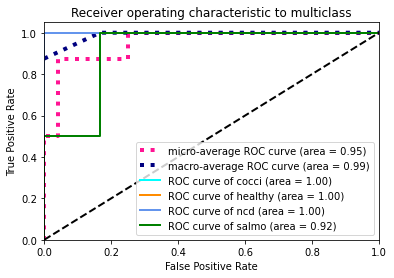

In [41]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_25.h5')

In [47]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
100/100 [==============================] - 36s 359ms/step - loss: 0.0476 - accuracy: 0.9862 - val_loss: 0.2112 - val_accuracy: 0.9400
Epoch 2/30
100/100 [==============================] - 38s 376ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.2141 - val_accuracy: 0.9400
Epoch 3/30
100/100 [==============================] - 35s 352ms/step - loss: 0.0342 - accuracy: 0.9925 - val_loss: 0.2223 - val_accuracy: 0.9400
Epoch 4/30
100/100 [==============================] - 35s 348ms/step - loss: 0.0363 - accuracy: 0.9900 - val_loss: 0.2090 - val_accuracy: 0.9350
Epoch 5/30
100/100 [==============================] - 34s 341ms/step - loss: 0.0374 - accuracy: 0.9875 - val_loss: 0.2036 - val_accuracy: 0.9350
Epoch 6/30
100/100 [==============================] - 35s 345ms/step - loss: 0.0516 - accuracy: 0.9812 - val_loss: 0.2063 - val_accuracy: 0.9400
Epoch 7/30
100/100 [==============================] - 35s 346ms/step - loss: 0.0413 - accuracy: 0.9900 - val_loss: 0.1967 - val_ac

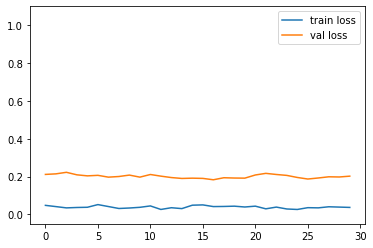

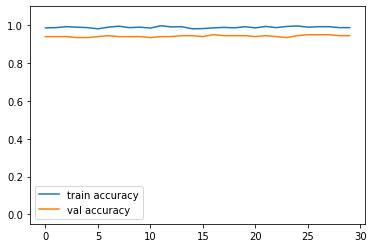

1/1 [==============================] - 0s 33ms/step


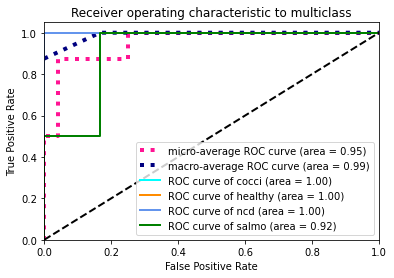

In [48]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_30.h5')

In [53]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
100/100 [==============================] - 37s 367ms/step - loss: 0.0425 - accuracy: 0.9850 - val_loss: 0.2013 - val_accuracy: 0.9400
Epoch 2/35
100/100 [==============================] - 35s 354ms/step - loss: 0.0324 - accuracy: 0.9925 - val_loss: 0.1938 - val_accuracy: 0.9500
Epoch 3/35
100/100 [==============================] - 36s 361ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.1901 - val_accuracy: 0.9550
Epoch 4/35
100/100 [==============================] - 36s 357ms/step - loss: 0.0368 - accuracy: 0.9950 - val_loss: 0.1952 - val_accuracy: 0.9450
Epoch 5/35
100/100 [==============================] - 34s 342ms/step - loss: 0.0390 - accuracy: 0.9887 - val_loss: 0.2021 - val_accuracy: 0.9400
Epoch 6/35
100/100 [==============================] - 34s 343ms/step - loss: 0.0324 - accuracy: 0.9912 - val_loss: 0.2059 - val_accuracy: 0.9400
Epoch 7/35
100/100 [==============================] - 35s 346ms/step - loss: 0.0379 - accuracy: 0.9925 - val_loss: 0.1991 - val_ac

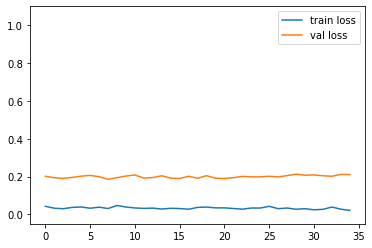

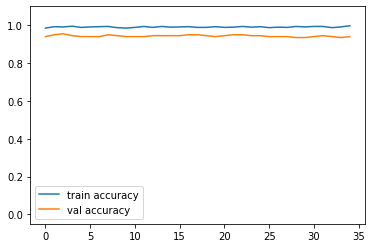

1/1 [==============================] - 0s 55ms/step


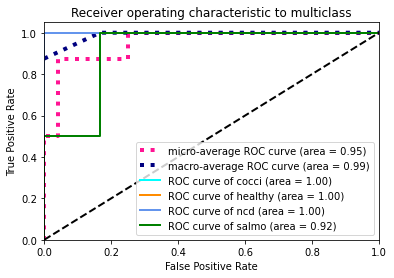

In [54]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_35.h5')

In [59]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
100/100 [==============================] - 35s 347ms/step - loss: 0.0243 - accuracy: 0.9950 - val_loss: 0.2165 - val_accuracy: 0.9350
Epoch 2/40
100/100 [==============================] - 34s 340ms/step - loss: 0.0274 - accuracy: 0.9875 - val_loss: 0.2123 - val_accuracy: 0.9300
Epoch 3/40
100/100 [==============================] - 34s 341ms/step - loss: 0.0360 - accuracy: 0.9875 - val_loss: 0.2251 - val_accuracy: 0.9350
Epoch 4/40
100/100 [==============================] - 34s 339ms/step - loss: 0.0275 - accuracy: 0.9937 - val_loss: 0.2015 - val_accuracy: 0.9400
Epoch 5/40
100/100 [==============================] - 34s 339ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.2026 - val_accuracy: 0.9350
Epoch 6/40
100/100 [==============================] - 34s 339ms/step - loss: 0.0328 - accuracy: 0.9912 - val_loss: 0.2022 - val_accuracy: 0.9350
Epoch 7/40
100/100 [==============================] - 34s 342ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.1962 - val_ac

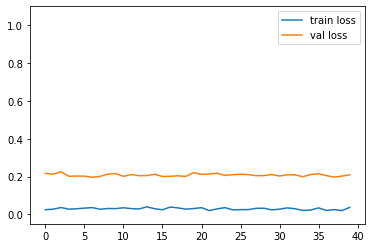

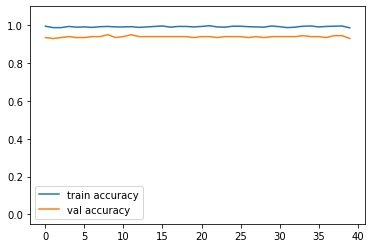

1/1 [==============================] - 0s 34ms/step


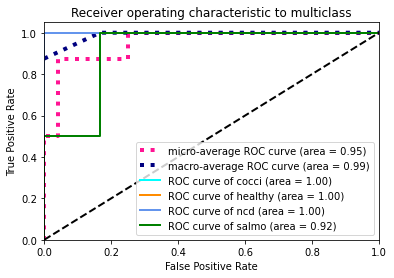

In [60]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_40.h5')

In [65]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/45
100/100 [==============================] - 35s 350ms/step - loss: 0.0274 - accuracy: 0.9925 - val_loss: 0.2026 - val_accuracy: 0.9350
Epoch 2/45
100/100 [==============================] - 35s 344ms/step - loss: 0.0302 - accuracy: 0.9925 - val_loss: 0.2074 - val_accuracy: 0.9400
Epoch 3/45
100/100 [==============================] - 34s 343ms/step - loss: 0.0247 - accuracy: 0.9950 - val_loss: 0.2058 - val_accuracy: 0.9400
Epoch 4/45
100/100 [==============================] - 35s 344ms/step - loss: 0.0287 - accuracy: 0.9887 - val_loss: 0.2136 - val_accuracy: 0.9400
Epoch 5/45
100/100 [==============================] - 34s 342ms/step - loss: 0.0327 - accuracy: 0.9925 - val_loss: 0.2043 - val_accuracy: 0.9450
Epoch 6/45
100/100 [==============================] - 34s 339ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.2087 - val_accuracy: 0.9400
Epoch 7/45
100/100 [==============================] - 34s 342ms/step - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.2076 - val_ac

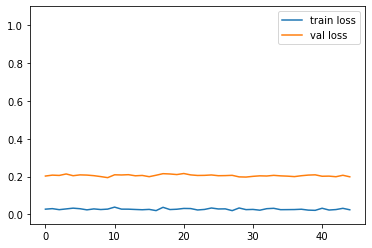

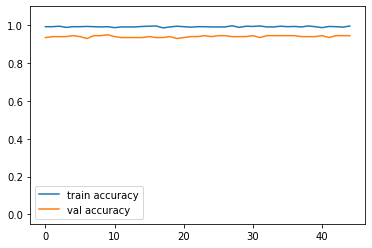

1/1 [==============================] - 0s 33ms/step


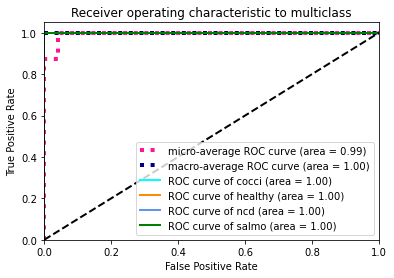

In [69]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_45.h5')

In [19]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
100/100 [==============================] - 64s 466ms/step - loss: 1.2319 - accuracy: 0.7063 - val_loss: 0.3395 - val_accuracy: 0.8800
Epoch 2/50
100/100 [==============================] - 39s 386ms/step - loss: 0.3289 - accuracy: 0.8813 - val_loss: 0.3940 - val_accuracy: 0.8350
Epoch 3/50
100/100 [==============================] - 36s 364ms/step - loss: 0.2604 - accuracy: 0.9112 - val_loss: 0.3501 - val_accuracy: 0.8500
Epoch 4/50
100/100 [==============================] - 36s 356ms/step - loss: 0.2079 - accuracy: 0.9225 - val_loss: 0.2539 - val_accuracy: 0.9100
Epoch 5/50
100/100 [==============================] - 38s 382ms/step - loss: 0.1869 - accuracy: 0.9287 - val_loss: 0.2793 - val_accuracy: 0.9100
Epoch 6/50
100/100 [==============================] - 40s 395ms/step - loss: 0.1671 - accuracy: 0.9463 - val_loss: 0.2546 - val_accuracy: 0.9150
Epoch 7/50
100/100 [==============================] - 39s 385ms/step - loss: 0.1633 - accuracy: 0.9375 - val_loss: 0.2543 - val_ac

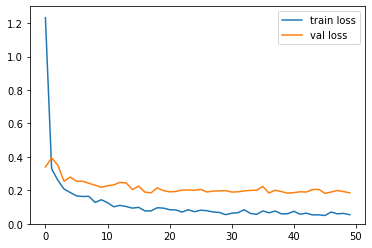

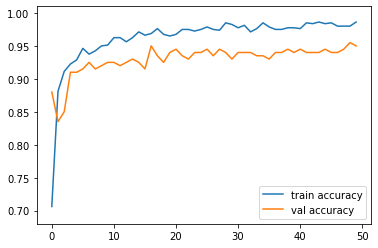

In [26]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.00, 1.3)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(0.68, 1.01)
plt.show()

1/1 [==============================] - 1s 1s/step


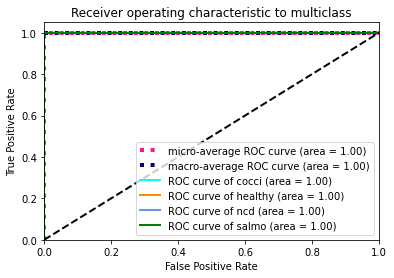

In [27]:
#plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_50.h5')

In [32]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/60
100/100 [==============================] - 34s 340ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.1844 - val_accuracy: 0.9500
Epoch 2/60
100/100 [==============================] - 34s 338ms/step - loss: 0.0598 - accuracy: 0.9775 - val_loss: 0.1958 - val_accuracy: 0.9450
Epoch 3/60
100/100 [==============================] - 34s 337ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.1934 - val_accuracy: 0.9600
Epoch 4/60
100/100 [==============================] - 34s 339ms/step - loss: 0.0409 - accuracy: 0.9937 - val_loss: 0.2067 - val_accuracy: 0.9550
Epoch 5/60
100/100 [==============================] - 34s 338ms/step - loss: 0.0476 - accuracy: 0.9875 - val_loss: 0.1941 - val_accuracy: 0.9600
Epoch 6/60
100/100 [==============================] - 34s 336ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.2004 - val_accuracy: 0.9400
Epoch 7/60
100/100 [==============================] - 34s 337ms/step - loss: 0.0527 - accuracy: 0.9875 - val_loss: 0.1992 - val_ac

100/100 [==============================] - 33s 332ms/step - loss: 0.0341 - accuracy: 0.9937 - val_loss: 0.1966 - val_accuracy: 0.9500
Epoch 58/60
100/100 [==============================] - 34s 336ms/step - loss: 0.0371 - accuracy: 0.9850 - val_loss: 0.2012 - val_accuracy: 0.9550
Epoch 59/60
100/100 [==============================] - 33s 334ms/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.1972 - val_accuracy: 0.9550
Epoch 60/60
100/100 [==============================] - 33s 332ms/step - loss: 0.0479 - accuracy: 0.9837 - val_loss: 0.1907 - val_accuracy: 0.9550


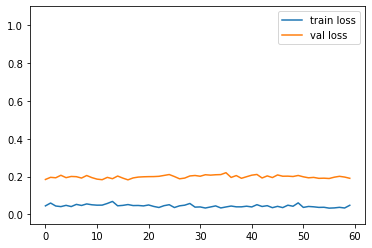

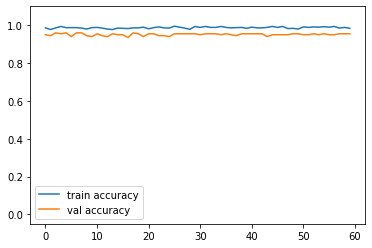

1/1 [==============================] - 0s 32ms/step


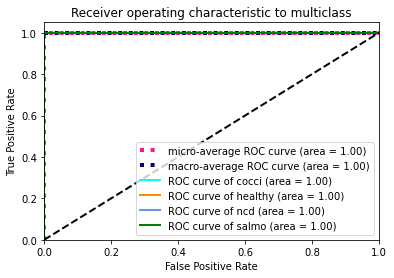

In [33]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_60.h5')

In [38]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=70,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/70
100/100 [==============================] - 46s 458ms/step - loss: 0.0319 - accuracy: 0.9937 - val_loss: 0.1926 - val_accuracy: 0.9550
Epoch 2/70
100/100 [==============================] - 37s 366ms/step - loss: 0.0321 - accuracy: 0.9937 - val_loss: 0.1981 - val_accuracy: 0.9600
Epoch 3/70
100/100 [==============================] - 35s 355ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.1954 - val_accuracy: 0.9550
Epoch 4/70
100/100 [==============================] - 35s 349ms/step - loss: 0.0467 - accuracy: 0.9837 - val_loss: 0.1931 - val_accuracy: 0.9550
Epoch 5/70
100/100 [==============================] - 35s 345ms/step - loss: 0.0401 - accuracy: 0.9912 - val_loss: 0.1976 - val_accuracy: 0.9600
Epoch 6/70
100/100 [==============================] - 34s 336ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.2018 - val_accuracy: 0.9550
Epoch 7/70
100/100 [==============================] - 34s 337ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.2070 - val_ac

100/100 [==============================] - 33s 334ms/step - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.2015 - val_accuracy: 0.9550
Epoch 58/70
100/100 [==============================] - 34s 336ms/step - loss: 0.0349 - accuracy: 0.9862 - val_loss: 0.1964 - val_accuracy: 0.9400
Epoch 59/70
100/100 [==============================] - 33s 333ms/step - loss: 0.0337 - accuracy: 0.9875 - val_loss: 0.1907 - val_accuracy: 0.9400
Epoch 60/70
100/100 [==============================] - 33s 334ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.1983 - val_accuracy: 0.9400
Epoch 61/70
100/100 [==============================] - 34s 336ms/step - loss: 0.0292 - accuracy: 0.9950 - val_loss: 0.2053 - val_accuracy: 0.9500
Epoch 62/70
100/100 [==============================] - 33s 332ms/step - loss: 0.0263 - accuracy: 0.9975 - val_loss: 0.1996 - val_accuracy: 0.9550
Epoch 63/70
100/100 [==============================] - 33s 334ms/step - loss: 0.0324 - accuracy: 0.9937 - val_loss: 0.1918 - val_accurac

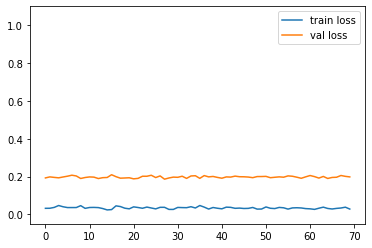

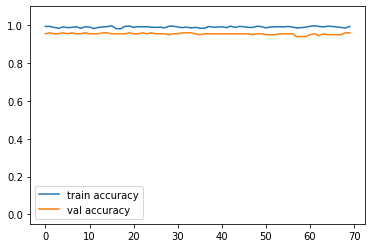

1/1 [==============================] - 0s 47ms/step


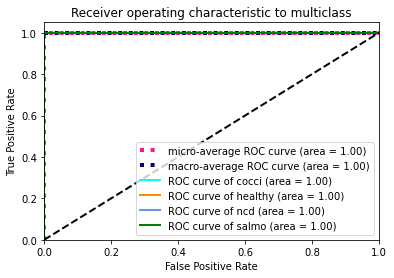

In [39]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_70.h5')

In [45]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
100/100 [==============================] - 38s 381ms/step - loss: 0.0416 - accuracy: 0.9900 - val_loss: 0.1953 - val_accuracy: 0.9500
Epoch 2/80
100/100 [==============================] - 34s 337ms/step - loss: 0.0325 - accuracy: 0.9887 - val_loss: 0.1900 - val_accuracy: 0.9500
Epoch 3/80
100/100 [==============================] - 34s 336ms/step - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.1944 - val_accuracy: 0.9500
Epoch 4/80
100/100 [==============================] - 34s 345ms/step - loss: 0.0358 - accuracy: 0.9912 - val_loss: 0.1918 - val_accuracy: 0.9500
Epoch 5/80
100/100 [==============================] - 34s 339ms/step - loss: 0.0326 - accuracy: 0.9937 - val_loss: 0.1984 - val_accuracy: 0.9550
Epoch 6/80
100/100 [==============================] - 34s 342ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.1945 - val_accuracy: 0.9550
Epoch 7/80
100/100 [==============================] - 34s 344ms/step - loss: 0.0259 - accuracy: 0.9937 - val_loss: 0.1982 - val_ac

100/100 [==============================] - 34s 334ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.2013 - val_accuracy: 0.9550
Epoch 58/80
100/100 [==============================] - 34s 336ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.2061 - val_accuracy: 0.9550
Epoch 59/80
100/100 [==============================] - 34s 336ms/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.2042 - val_accuracy: 0.9600
Epoch 60/80
100/100 [==============================] - 34s 336ms/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.2047 - val_accuracy: 0.9600
Epoch 61/80
100/100 [==============================] - 34s 337ms/step - loss: 0.0231 - accuracy: 0.9950 - val_loss: 0.2079 - val_accuracy: 0.9600
Epoch 62/80
100/100 [==============================] - 34s 338ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.2037 - val_accuracy: 0.9600
Epoch 63/80
100/100 [==============================] - 33s 334ms/step - loss: 0.0277 - accuracy: 0.9937 - val_loss: 0.1982 - val_accurac

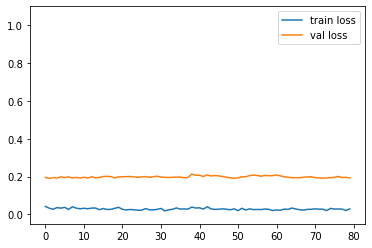

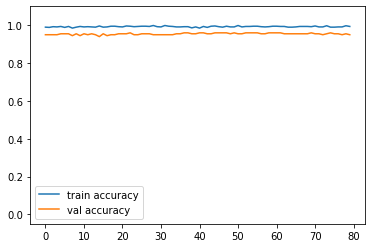

1/1 [==============================] - 0s 37ms/step


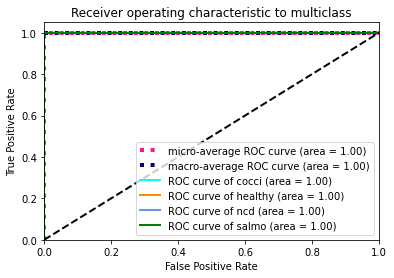

In [46]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_80.h5')

In [51]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/90
100/100 [==============================] - 35s 348ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.1977 - val_accuracy: 0.9550
Epoch 2/90
100/100 [==============================] - 34s 335ms/step - loss: 0.0292 - accuracy: 0.9887 - val_loss: 0.1962 - val_accuracy: 0.9550
Epoch 3/90
100/100 [==============================] - 34s 339ms/step - loss: 0.0233 - accuracy: 0.9962 - val_loss: 0.1975 - val_accuracy: 0.9550
Epoch 4/90
100/100 [==============================] - 34s 337ms/step - loss: 0.0278 - accuracy: 0.9925 - val_loss: 0.2021 - val_accuracy: 0.9550
Epoch 5/90
100/100 [==============================] - 34s 334ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.1934 - val_accuracy: 0.9550
Epoch 6/90
100/100 [==============================] - 34s 339ms/step - loss: 0.0286 - accuracy: 0.9937 - val_loss: 0.1944 - val_accuracy: 0.9550
Epoch 7/90
100/100 [==============================] - 34s 338ms/step - loss: 0.0316 - accuracy: 0.9912 - val_loss: 0.1927 - val_ac

100/100 [==============================] - 34s 339ms/step - loss: 0.0207 - accuracy: 0.9975 - val_loss: 0.1966 - val_accuracy: 0.9550
Epoch 58/90
100/100 [==============================] - 34s 334ms/step - loss: 0.0207 - accuracy: 0.9962 - val_loss: 0.1945 - val_accuracy: 0.9450
Epoch 59/90
100/100 [==============================] - 34s 342ms/step - loss: 0.0252 - accuracy: 0.9937 - val_loss: 0.1985 - val_accuracy: 0.9550
Epoch 60/90
100/100 [==============================] - 35s 350ms/step - loss: 0.0209 - accuracy: 0.9962 - val_loss: 0.1964 - val_accuracy: 0.9450
Epoch 61/90
100/100 [==============================] - 34s 338ms/step - loss: 0.0168 - accuracy: 0.9987 - val_loss: 0.1987 - val_accuracy: 0.9450
Epoch 62/90
100/100 [==============================] - 36s 356ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.1950 - val_accuracy: 0.9450
Epoch 63/90
100/100 [==============================] - 35s 346ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.1988 - val_accurac

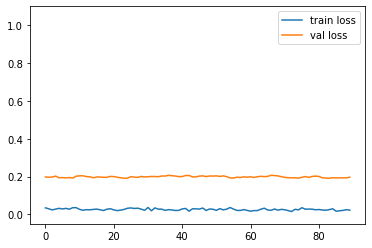

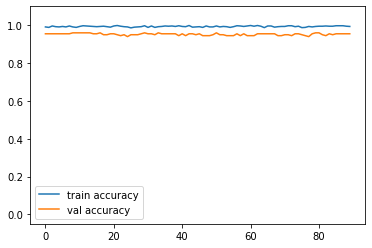

1/1 [==============================] - 0s 34ms/step


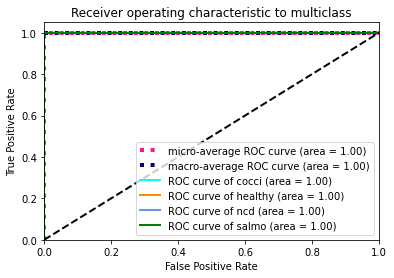

In [52]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_90.h5')

In [57]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
100/100 [==============================] - 36s 364ms/step - loss: 0.0266 - accuracy: 0.9925 - val_loss: 0.1947 - val_accuracy: 0.9550
Epoch 2/100
100/100 [==============================] - 35s 353ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.1896 - val_accuracy: 0.9550
Epoch 3/100
100/100 [==============================] - 35s 352ms/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.1929 - val_accuracy: 0.9550
Epoch 4/100
100/100 [==============================] - 35s 353ms/step - loss: 0.0203 - accuracy: 0.9975 - val_loss: 0.1955 - val_accuracy: 0.9600
Epoch 5/100
100/100 [==============================] - 35s 350ms/step - loss: 0.0228 - accuracy: 0.9950 - val_loss: 0.1973 - val_accuracy: 0.9600
Epoch 6/100
100/100 [==============================] - 36s 359ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.1943 - val_accuracy: 0.9550
Epoch 7/100
100/100 [==============================] - 35s 353ms/step - loss: 0.0255 - accuracy: 0.9962 - val_loss: 0.1980 -

Epoch 57/100
100/100 [==============================] - 36s 359ms/step - loss: 0.0292 - accuracy: 0.9887 - val_loss: 0.1949 - val_accuracy: 0.9550
Epoch 58/100
100/100 [==============================] - 37s 370ms/step - loss: 0.0250 - accuracy: 0.9937 - val_loss: 0.1945 - val_accuracy: 0.9550
Epoch 59/100
100/100 [==============================] - 36s 361ms/step - loss: 0.0254 - accuracy: 0.9975 - val_loss: 0.1910 - val_accuracy: 0.9500
Epoch 60/100
100/100 [==============================] - 36s 365ms/step - loss: 0.0201 - accuracy: 0.9987 - val_loss: 0.1917 - val_accuracy: 0.9450
Epoch 61/100
100/100 [==============================] - 37s 365ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.1940 - val_accuracy: 0.9500
Epoch 62/100
100/100 [==============================] - 36s 358ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.1954 - val_accuracy: 0.9550
Epoch 63/100
100/100 [==============================] - 36s 357ms/step - loss: 0.0221 - accuracy: 0.9987 - val_loss: 0

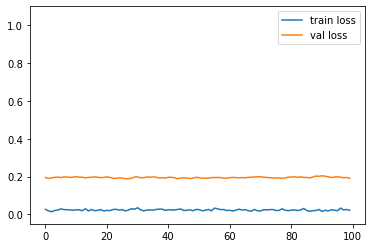

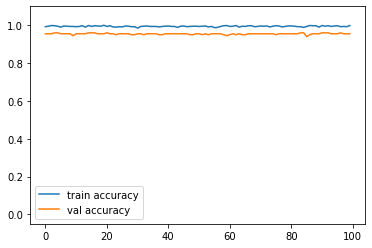

1/1 [==============================] - 0s 44ms/step


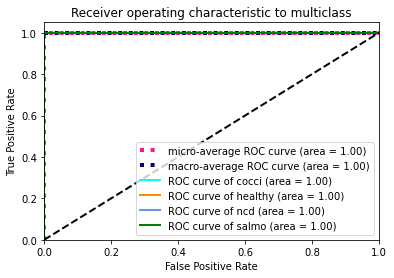

In [58]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/inception_100.h5')

In [59]:
total_count = 0
path = 'D:/MScCS/thesis/Dataset/new/separate testing/cocci/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.inception_v3.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 0):
        count = count + 1
        
print('Total accurate prediction for cocci:', count)

total_count = total_count + count

1/1 [==============================] - 0s 27ms/step
Total accurate prediction for cocci: 25


In [60]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/healthy/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.inception_v3.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 1):
        count = count + 1
        
print('Total accurate prediction for healthy:', count)
total_count = total_count + count

1/1 [==============================] - 0s 26ms/step
Total accurate prediction for healthy: 23


In [61]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/ncd/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.inception_v3.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 2):
        count = count + 1
        
print('Total accurate prediction for ncd:', count)
total_count = total_count + count

1/1 [==============================] - 0s 29ms/step
Total accurate prediction for ncd: 9


In [62]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/salmo/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.inception_v3.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 3):
        count = count + 1
        
print('Total accurate prediction for salmo:', count)
total_count = total_count + count
print(total_count)

1/1 [==============================] - 0s 33ms/step
Total accurate prediction for salmo: 20
77


In [ ]:
#epoch 10,15,20 - 74
#epoch 30,35,40,45 - 75
#epoch 25 - 76
#epoch 50,60,70,90,100 - 77
#epoch 80 - 78